array([[[253,  93,   0],
        [255,  96,   0],
        [254,  97,   0],
        ...,
        [248,  76,   0],
        [247,  75,   0],
        [246,  73,   0]],

       [[255,  96,   0],
        [254,  97,   0],
        [255, 100,   1],
        ...,
        [250,  79,   1],
        [249,  77,   1],
        [248,  76,   0]],

       [[253,  97,   0],
        [255, 100,   1],
        [255, 101,   0],
        ...,
        [250,  79,   0],
        [250,  79,   1],
        [249,  78,   0]],

       ...,

       [[129,  52,   1],
        [132,  52,   0],
        [129,  57,   1],
        ...,
        [129,  28,   0],
        [113,  22,   1],
        [131,  17,   1]],

       [[127,  52,   0],
        [120,  49,  11],
        [122,  50,   2],
        ...,
        [122,  19,  10],
        [129,  24,   0],
        [115,  21,   2]],

       [[126,  47,   4],
        [218, 217, 203],
        [ 74, 142,  94],
        ...,
        [213, 193, 160],
        [108,  30,   6],
        [135, 127, 119]]], dtype=uint8)
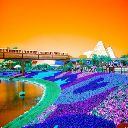

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import cv2
import skimage
import numpy as np
import pandas as pd
from skimage.metrics import structural_similarity as ssim
def draw_picture(image, title, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image.astype("uint8"))
    plt.title(f'{title}, ssim={round(ssim(image, new_image, multichannel=True), 2)}')
    plt.show()
#Для загрузки картинки можно использовать код:|
image = cv2.imread('Изображение_к_дз_по_Кластеризации_feml.jpg')
image = cv2.resize(image, (128, 128))
image

In [ ]:
# Преобразуйте изображение в массив
image_array = np.array(image)

# Преобразуйте изображение в двумерный массив
image_flat = image_array.reshape(-1, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-28-3a9d414c3f41>:15: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  plt.title(f'{title}, ssim={round(ssim(image, new_image, multichannel=True), 2)}')


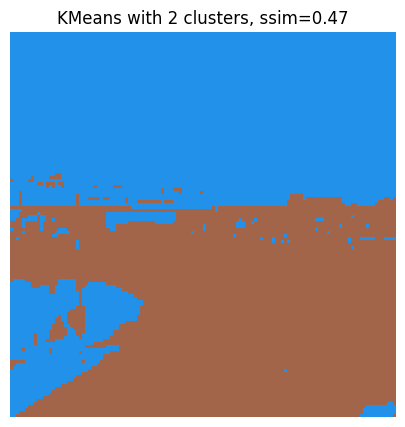

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-28-3a9d414c3f41>:15: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  plt.title(f'{title}, ssim={round(ssim(image, new_image, multichannel=True), 2)}')


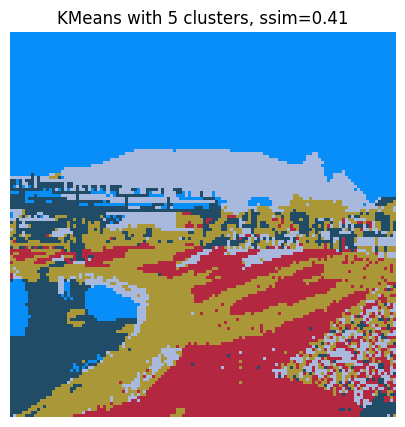

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-28-3a9d414c3f41>:15: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  plt.title(f'{title}, ssim={round(ssim(image, new_image, multichannel=True), 2)}')


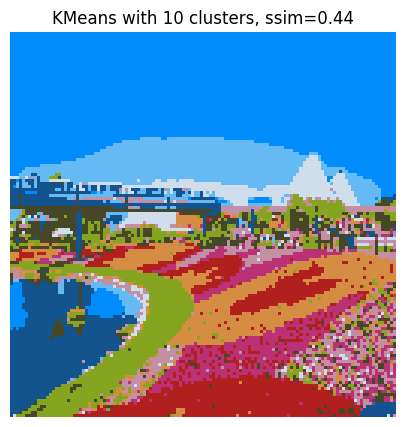

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-28-3a9d414c3f41>:15: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  plt.title(f'{title}, ssim={round(ssim(image, new_image, multichannel=True), 2)}')


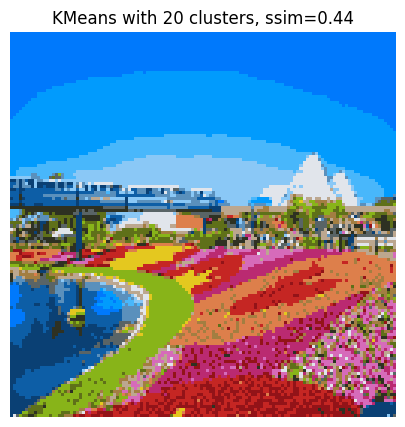

In [ ]:
# Модель KMeans
k_values = [2, 5, 10, 20]
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(image_flat)
    clustered_image = kmeans.cluster_centers_[labels].reshape(image_array.shape)
    draw_picture(clustered_image, f'KMeans with {k} clusters')

In [ ]:
#Нормализуем изображение
df11 = pd.DataFrame(image_flat)
df11 = df11.rename(columns={0: "R", 1: "G", 2: "B"})
df1 = df11.copy()
for column in df1.columns:
  df1[column] = df1[column]/df1[column].max()

In [ ]:
# Модель DBSCAN
#Предсказываем классы
dbscan = DBSCAN(eps=0.0285, min_samples=1)
dbscan_labels = dbscan.fit_predict(df1.to_numpy())

In [ ]:
#Соединяем классы и пиксели
df2 = pd.DataFrame(dbscan_labels)
df2 = df2.rename(columns={0: "dbscan_labels"})
df3 = pd.concat([df1, df2], axis=1)
a = list()
for i in set(dbscan_labels):
  a.append(np.mean(df3[df3["dbscan_labels"]==i].to_numpy(), axis=0))
b = pd.DataFrame(a)
b = b.rename(columns={0: "R", 1: "G", 2: "B", 3: "labels"})
#Заменяем каждый пиксель на цвет того класса, к которому он принадлежит
df4 = pd.DataFrame(df3['dbscan_labels']).merge(b, how='left', left_on='dbscan_labels', right_on = 'labels')[['R', 'G', 'B']]
for column in df4:
  df4[column] = df4[column]*df11[column].max()
df4

,R,G,B
0,253.302854,151.689475,23.259589
1,253.302854,151.689475,23.259589
2,253.302854,151.689475,23.259589
3,253.302854,151.689475,23.259589
4,253.302854,151.689475,23.259589
...,...,...,...
16379,116.210526,24.842105,1.912281
16380,116.210526,24.842105,1.912281
16381,253.302854,151.689475,23.259589
16382,116.210526,24.842105,1.912281


<ipython-input-28-3a9d414c3f41>:15: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  plt.title(f'{title}, ssim={round(ssim(image, new_image, multichannel=True), 2)}')


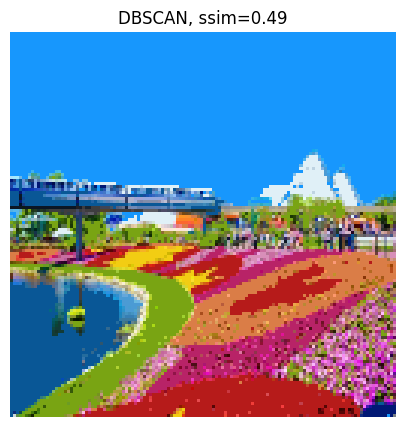

In [ ]:
# Модель DBSCAN
dbscan_clustered_image = df4.to_numpy().reshape(image_array.shape)
draw_picture(dbscan_clustered_image, 'DBSCAN')

<ipython-input-28-3a9d414c3f41>:15: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  plt.title(f'{title}, ssim={round(ssim(image, new_image, multichannel=True), 2)}')


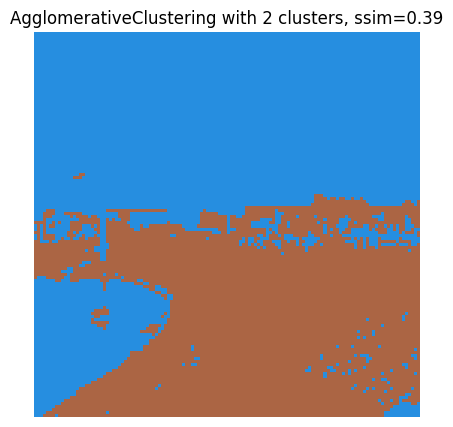

<ipython-input-28-3a9d414c3f41>:15: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  plt.title(f'{title}, ssim={round(ssim(image, new_image, multichannel=True), 2)}')


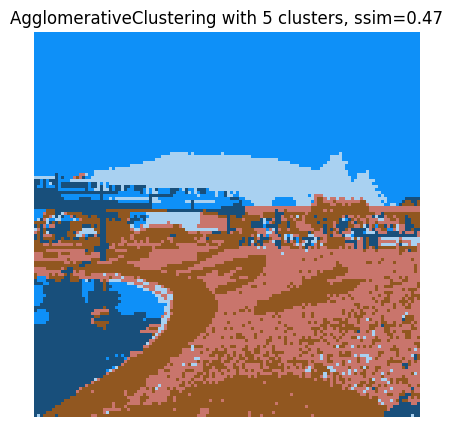

<ipython-input-28-3a9d414c3f41>:15: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  plt.title(f'{title}, ssim={round(ssim(image, new_image, multichannel=True), 2)}')


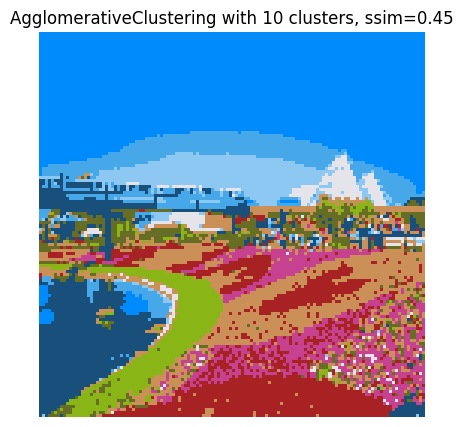

<ipython-input-28-3a9d414c3f41>:15: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  plt.title(f'{title}, ssim={round(ssim(image, new_image, multichannel=True), 2)}')


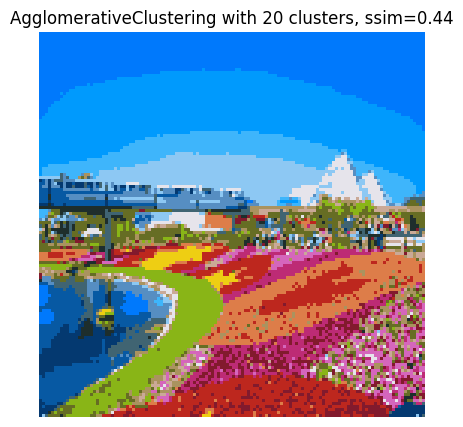

In [ ]:
# Модель AgglomerativeClustering
agglomerative_values = [2, 5, 10, 20]
for k in agglomerative_values:
  agglomerative = AgglomerativeClustering(n_clusters=k)
  agglomerative_labels = agglomerative.fit_predict(df1.to_numpy())
  #Соединяем классы и пиксели
  df2 = pd.DataFrame(agglomerative_labels)
  df2 = df2.rename(columns={0: "agglomerative_labels"})
  df3 = pd.concat([df1, df2], axis=1)
  a = list()
  for i in set(agglomerative_labels):
    a.append(np.mean(df3[df3["agglomerative_labels"]==i].to_numpy(), axis=0))
  b = pd.DataFrame(a)
  b = b.rename(columns={0: "R", 1: "G", 2: "B", 3: "labels"})
  #Заменяем каждый пиксель на цвет того класса, к которому он принадлежит
  df4 = pd.DataFrame(df3['agglomerative_labels']).merge(b, how='left', left_on='agglomerative_labels', right_on = 'labels')[['R', 'G', 'B']]
  for column in df4:
    df4[column] = df4[column]*df11[column].max()
  agglomerative_clustered_image = df4.to_numpy().reshape(image_array.shape)
  draw_picture(agglomerative_clustered_image, f'AgglomerativeClustering with {k} clusters')